In [39]:
import kagglehub
Startups_dataset = kagglehub.dataset_download('karthickveerakumar/startup-logistic-regression')

print('Data source import complete.')


Using Colab cache for faster access to the 'startup-logistic-regression' dataset.
Data source import complete.


## Startups Profit Prediction Model
## Table Of Contents

1. Importing Libraries
2. Load & Understand the dataset
3. Handling Missing Values
4. Handling Outliers
5. Splitting The Dataset
6. Feature Scaling
7. Training our Machine Learning Model
8. Plotting the performance of the model
9. Evaluation the model

### Importing Libraries

In [40]:
# Data Science Tools
import numpy as np
import pandas as pd

# Data Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Scikit-Learn Library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Evaluation Metric Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Load & Understand The Dataset

In [41]:
Data = pd.read_csv(f'{Startups_dataset}/50_Startups.csv')

In [42]:
Data.shape # Dimensions (rows, columns) "Attribute"

(50, 5)

In [43]:
Data.head(5) # first 5 rows/records "Method"

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [44]:
Data.columns  # "Attribute"

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [45]:
Data.dtypes  # "Attribute"

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


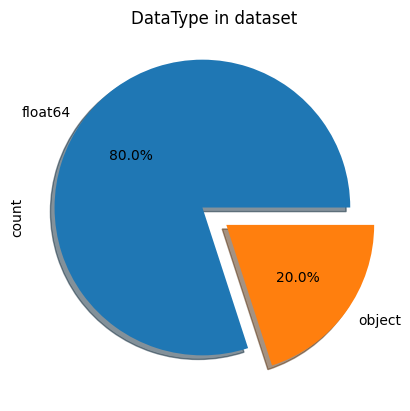

In [46]:
Data.dtypes.value_counts().plot.pie(explode=[0.1,0.1], autopct="%1.1f%%", shadow=True)
plt.title("DataType in dataset");

In [47]:
Data.info()  # "Method"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [48]:
Data.describe().style.background_gradient(cmap="Blues")  # "Method"

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Handling Missing Values

In [49]:
if Data.isnull().values.any():
    print("Unfortunately, there are missing values in the dataset\n")
else:
    print("Fortunately, there aren't missing values in the dataset.")

Fortunately, there aren't missing values in the dataset.


**Analysis and exploration of categories of the "State" feature**

In [50]:
# check labels in "State" feature
Data["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [51]:
Data["State"].value_counts()

,count
State,
New York,17
California,17
Florida,16


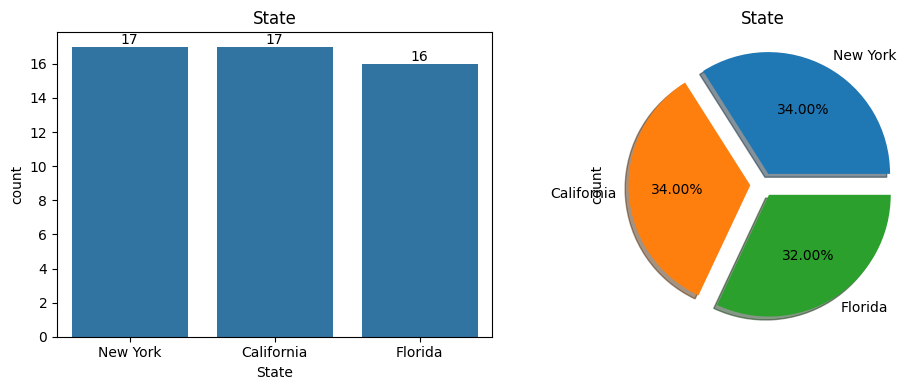

In [52]:
# Set the figure size
plt.figure(figsize=(10, 4))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="State", data=Data)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("State", fontsize=12)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["State"].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct="%1.2f%%", shadow=True)
Right_Shape.set_title(label="State", fontsize=12)

plt.tight_layout()
plt.show()

In [53]:
# Label Encoding
Data["State"].replace({"California":0, "Florida":1, "New York":2}, inplace=True)

# (0) => California
# (1) => Florida
# (2) => New York

### Handling Outliers

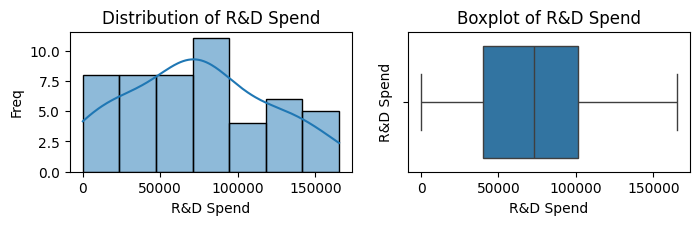

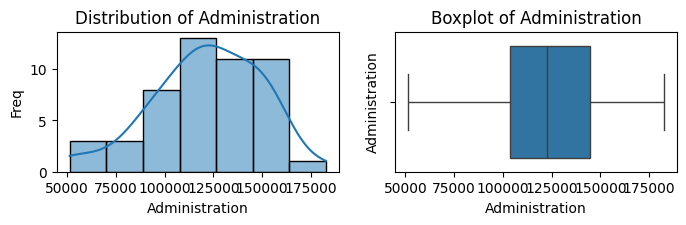

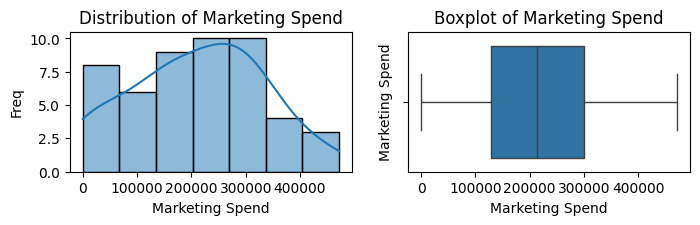

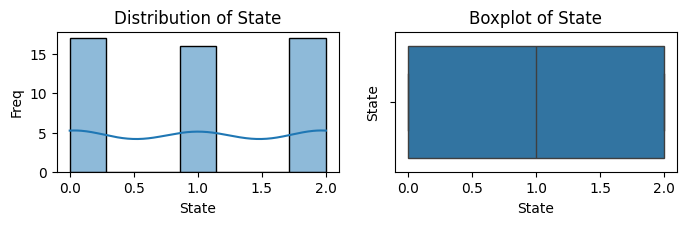

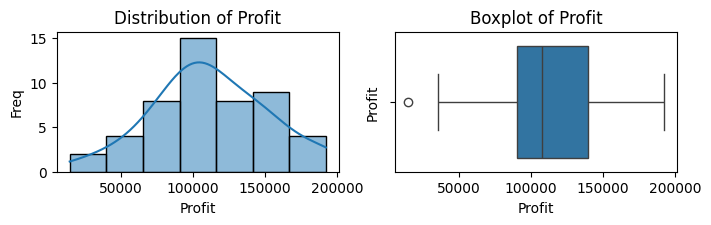

In [54]:
# Outliers = Unusual Values
for column in Data.columns:
    if Data[column].dtype!="object":
        plt.figure(figsize=(8, 4))
        plt.subplot(2, 2, 1)
        sns.histplot(data=Data, x=column, kde=True)
        plt.ylabel("Freq")
        plt.xlabel(column)
        plt.title(f"Distribution of {column}")
        plt.subplot(2, 2, 2)
        sns.boxplot(data=Data, x=column)
        plt.ylabel(column)
        plt.title(f"Boxplot of {column}")
        plt.show()

In [55]:
# Z-Score Normalization
# Calculate Z-scores for each feature
Z_Scores = (Data - Data.mean()) / Data.std()
Threshold = 3    # Is a commonly used standard
Outliers = (Z_Scores > Threshold) | (Z_Scores < -Threshold)

# Check if there are any outliers
if Outliers.any().any():
    print("Outliers detected in the dataset. Removing them...")

    # Remove Outliers
    Data = Data[~Outliers.any(axis=1)]
    Data.reset_index(drop=True, inplace=True)

    print("Outliers removed. Data shape:", Data.shape)
else:
    print("No outliers detected in the dataset.")

No outliers detected in the dataset.


### Splitting The Dataset

In [56]:
# X Data
X = Data.drop(["Profit"], axis=1)
print("X shape is : ", X.shape)

# y Data
y = Data["Profit"]
print("y shape is : ", y.shape)

X shape is :  (50, 4)
y shape is :  (50,)


In [57]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Splitted Data
print("X_train shape is ", X_train.shape)
print("X_val shape is ", X_val.shape)
print("y_train shape is ", y_train.shape)
print("y_val shape is ", y_val.shape)

X_train shape is  (35, 4)
X_val shape is  (15, 4)
y_train shape is  (35,)
y_val shape is  (15,)


### Feature Scaling

In [58]:
# MinMaxScaler for Data

Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_val = Scaler.transform(X_val)

### Training Our Machine Learning Model

**Applying "Linear Regression" Algorithm**

In [59]:
Model_LR = LinearRegression()
Model_LR.fit(X_train, y_train)
y_train_pred = Model_LR.predict(X_train)
y_val_pred = Model_LR.predict(X_val)

Execution Time Of Model: 4e-05 Seconds



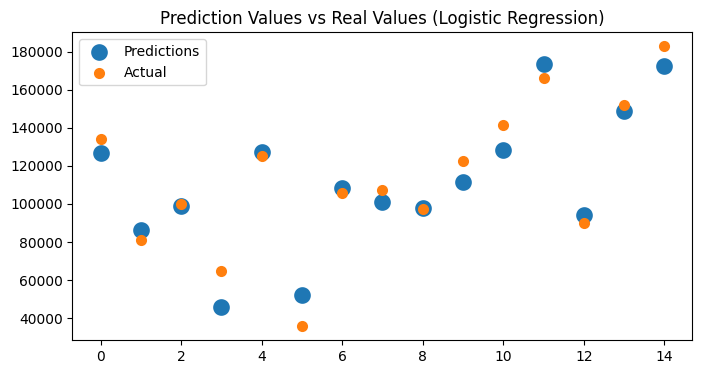

In [60]:
Start = time.time()
End = time.time()
Model_LR_Time = End - Start
print(f"Execution Time Of Model: {round((Model_LR_Time), 5)} Seconds\n")

# Plot And Compute Metrics
plt.figure(figsize=(8,4))
plt.scatter(range(len(y_val_pred)), y_val_pred,  lw=6, label="Predictions")
plt.scatter(range(len(y_val)), y_val,  lw=2, label="Actual")
plt.title("Prediction Values vs Real Values (Logistic Regression)")
plt.legend()
plt.show()

In [61]:
Training_Data_Model_score = Model_LR.score(X_train, y_train)
print(f'Mode Score/Performance On Training Data {Training_Data_Model_score * 100:.2f}%')

Testing_Data_Model_score = Model_LR.score(X_val, y_val)
print(f'Mode Score/Performance On Testing Data {Testing_Data_Model_score * 100:.2f}%')

Mode Score/Performance On Training Data 95.10%
Mode Score/Performance On Testing Data 94.04%


### Plotting the performance of the model

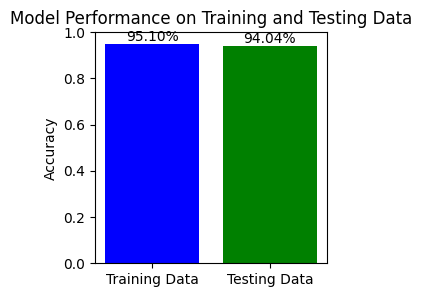

In [62]:
# Model scores for each dataset
training_score = Training_Data_Model_score
testing_score = Testing_Data_Model_score

# Define datasets and corresponding scores
datasets = ['Training Data', 'Testing Data']
scores = [training_score, testing_score]

# Plotting
plt.figure(figsize=(3,3))
plt.bar(datasets, scores, color=['blue', 'green'])
plt.ylim(0, 1)  # Set y-axis limits to be between 0 and 1 for accuracy percentage
plt.ylabel('Accuracy')
plt.title('Model Performance on Training and Testing Data')

# Adding values on top of the bars
for i, score in enumerate(scores):
    plt.text(i, score, f'{score * 100:.2f}%', ha='center', va='bottom')

plt.show()

### Evaluation the model

In [63]:
# Calculating r2_score
r2_Score = r2_score(y_val_pred, y_val)
print('R2 Score Of Model is : ', r2_Score * 100)

# Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_val_pred, y_val)
print('Mean Absolute Error Value is : ', MAEValue * 100)

# Calculating Mean Squared Error
MSEValue = mean_squared_error(y_val_pred, y_val)
print('Mean Squared Error Value is : ', MSEValue * 100)

R2 Score Of Model is :  93.38388124691896
Mean Absolute Error Value is :  737116.1531097549
Mean Squared Error Value is :  8386602764.431885
